# NBA Players Future Prediction


---


Marcel PIE
2024

**OBJECTIVE:** PREDICT WETHER OR NOT AN NBA PLAYER IS GOING TO PLAY FOR 5+ YEARS BASED ON AVAILABLE STATS.

DISPLAY PREDICTION ON INVESTOR API.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
    recall/=3
    print(confusion_mat)
    print(recall)


# Load dataset
df = pd.read_csv("/content/nba_logreg.csv")

# extract names, labels, features names and values
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values

# replacing Nan values (only present when no 3 points attempts have been performed by a player)
for x in np.argwhere(np.isnan(df_vals)):
    df_vals[x]=0.0

# normalize dataset
X = MinMaxScaler().fit_transform(df_vals)

#example of scoring with support vector classifier
score_classifier(X,SVC(),labels)

# TODO build a training set and choose a classifier which maximize recall score returned by the score_classifier function

[[271. 238.]
 [145. 686.]]
0.82551959002102


## Analyse Exploratoire des Données

**Commençons par plonger dans les données:**

*   Réaliser quelques statistiques élémentaires et les visualiser
*   Chercher des données manquantes, des outliers, etc



---






In [ ]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


On remarque que certaines variables possèdent une **variance supérieure à leur moyenne**, ce qui peut être du à des répartitions très "**skewed**".

Il serait intéressant de regarder ces variables plus en détail afin de déterminer si cela peut apporter des informations importantes.

Autement, il serait utile de **scale les données** afin de normaliser l'importance de ces variables dans le modèle.

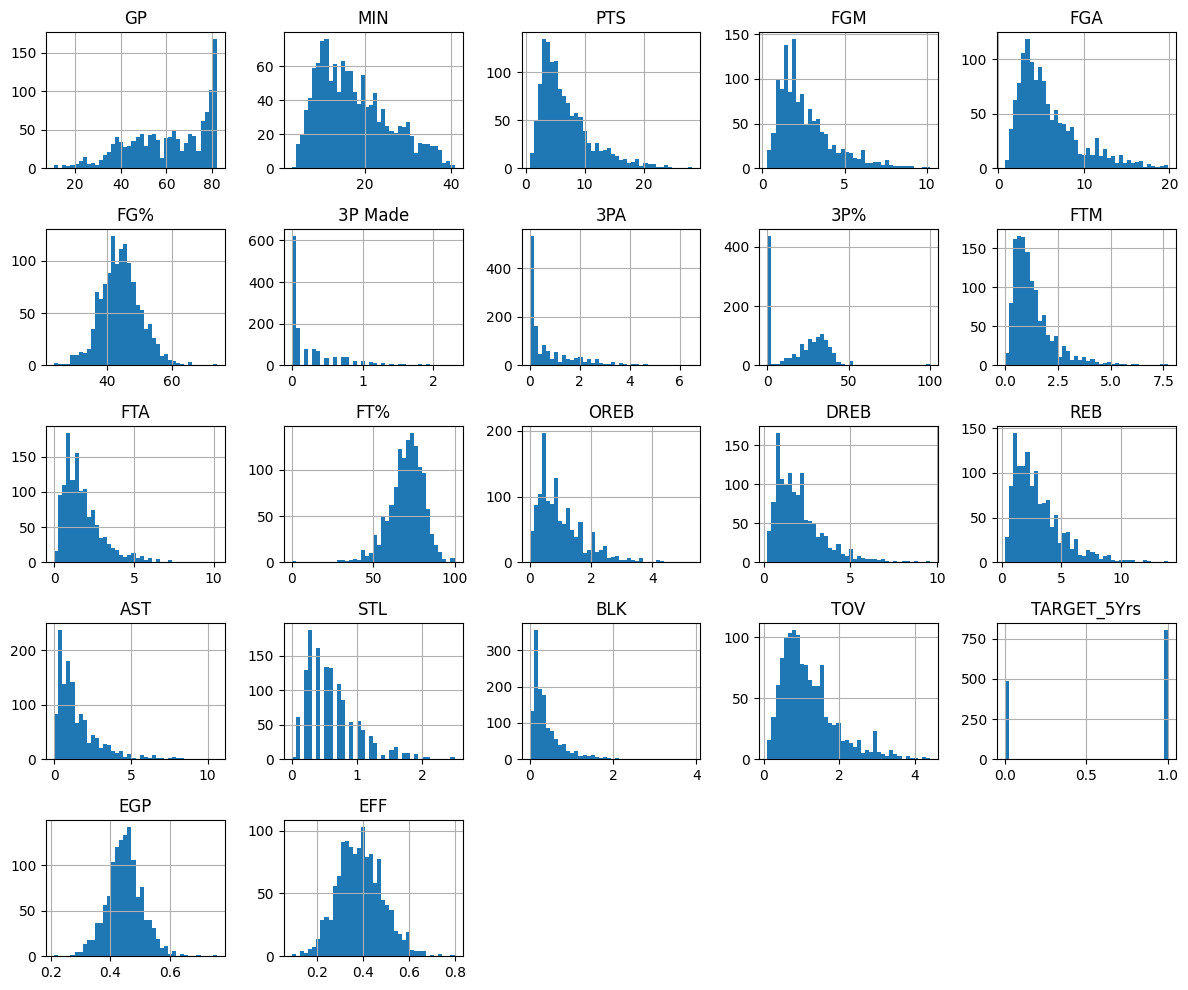

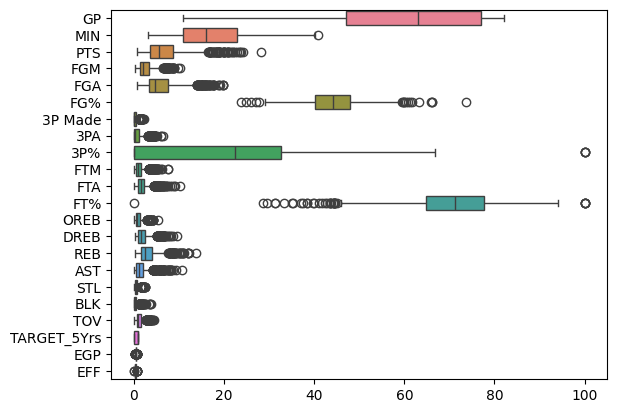

In [ ]:
# Histogramme
df.hist(figsize=(12, 10), bins=40)
plt.tight_layout()
plt.show()

# Box plot
sns.boxplot(data=df, orient='h')
plt.show()

On remarque un **déséquilibre de classe** pour certains paramètres. Par exemple:

*   Peu de joueurs ont joué un petit nombre de matches: ceci peut rendre difficile de correctement classifier les "rookies".
*   Beaucoup de joueurs n'ont jamais marqué de 3 points (voir 3P%)

Pour ces raisons, il peut être judicieux de rééquilibrer les classes en performant du "**oversampling**" ou "undersampling", et autre techniques.

Ou bien de choisir un modèle robuste vis à vis de ce déséquilibre, comme un **RandomForest ou XGBoost**, à la place d'un SVM ou d'une regression logistique.

<ipython-input-7-fc16737868fa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = abs(df.corr())


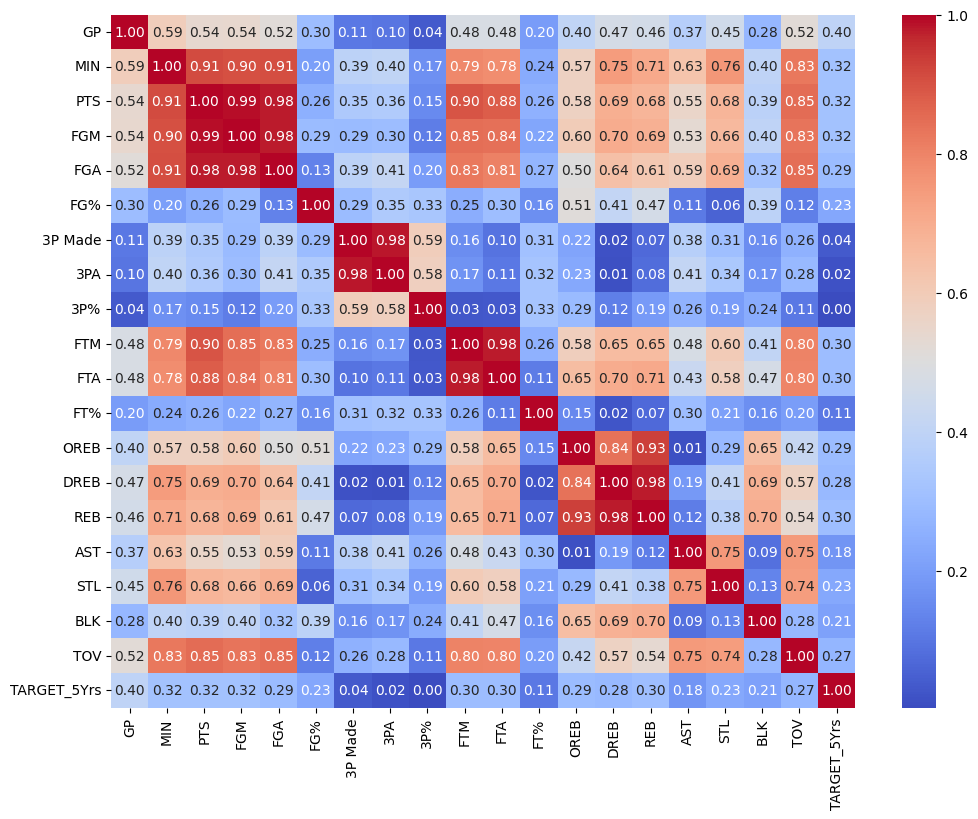

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 9))
correlation_matrix = abs(df.corr())
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Il existe des variables fortement corrélées comme PTS, FGM et FGA (points per game, field goals made et field goals attempts).

Il faut tenir compte de cela au moment de choisir un modèle, ou bien supprimer des variables avant d'implémenter un modèle sensible à la multicolinéarité.

**Cherchons maintenant s'il y a des valeurs manquantes et des doublons parmis les données**

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


Il existe 11 valeurs manquantes dans la colonne 3P%. Regardons ça de plus près:

In [ ]:
missing_3P_percent = df[df['3P%'].isnull()]
print(missing_3P_percent)

               Name  GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA  3P%  ...  \
338     Ken Johnson  64  12.7   4.1  1.8  3.3  52.8      0.0  0.0  NaN  ...   
339     Ken Johnson  64  12.7   4.1  1.8  3.3  52.8      0.0  0.0  NaN  ...   
340   Pete Williams  53  10.8   2.8  1.3  2.1  60.4      0.0  0.0  NaN  ...   
358   Melvin Turpin  79  24.7  10.6  4.6  9.0  51.1      0.0  0.0  NaN  ...   
386    Jim Petersen  60  11.9   3.2  1.2  2.4  48.6      0.0  0.0  NaN  ...   
397   Tom Scheffler  39   6.9   1.3  0.5  1.3  41.2      0.0  0.0  NaN  ...   
507    Sam Williams  59  18.2   6.1  2.6  4.7  55.6      0.0  0.0  NaN  ...   
509   Kurt Nimphius  63  17.2   5.3  2.2  4.7  46.1      0.0  0.0  NaN  ...   
510  Pete Verhoeven  71  17.0   4.9  2.1  4.2  50.3      0.0  0.0  NaN  ...   
521       Jim Smith  72  11.9   2.9  1.2  2.3  50.9      0.0  0.0  NaN  ...   
559    Jeff Wilkins  56  18.9   4.7  2.1  4.6  45.0      0.0  0.0  NaN  ...   

     FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV

Les données manquantes dans la colonne 3P% correspondent aux joueurs n'ayant pas essayé ni marqué des paniers de 3 points.

**Est-ce que c'est le cas pour tous les joueurs qui n'ont pas essayé de marquer des 3P ?**

In [ ]:
# Filtrer les joueurs avec 0 3P Made et 0 3PA
zero_3p_players = df[(df['3P Made'] == 0) & (df['3PA'] == 0)]

# Filtrer les lignes ou '3P%' ne vaut pas NaN
non_nan_3p_percentage_players = zero_3p_players[~zero_3p_players['3P%'].isna()]

print("Valeur de 3P% pour les joueurs avec 0 3P MAde et 0 3PA mais pas de NaN pour 3P%:\n")
print(non_nan_3p_percentage_players['3P%'].value_counts())

Valeur de 3P% pour les joueurs avec 0 3P MAde et 0 3PA mais pas de NaN pour 3P%:

0.0      327
50.0       7
33.3       7
100.0      4
25.0       4
Name: 3P%, dtype: int64


Ce n'est pas toujours le cas.

**On décide de remplacer les NaN values par 0, et laisser les autres valeurs de 3P% intactes car elles peuvent avoir été rentrées en se basant sur des estimations.**

In [ ]:
df['3P%'].fillna(0, inplace=True)

**Cherchons maintenant les doublons**

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Lignes avec doublons:")
print(duplicate_rows)

Lignes avec doublons:
                  Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  \
163      Charles Smith  60   8.7   2.9  1.0   2.2  44.4      0.0  0.1   0.0   
166      Charles Smith  71  30.4  16.3  6.1  12.4  49.5      0.0  0.0   0.0   
169      Charles Smith  34   8.6   3.5  1.4   3.7  39.2      0.4  1.4  31.9   
243    Reggie Williams  35  24.5  10.4  4.3  12.2  35.6      0.4  1.7  22.4   
339        Ken Johnson  64  12.7   4.1  1.8   3.3  52.8      0.0  0.0   0.0   
366      Charles Jones  78  20.1   8.4  3.0   5.8  52.0      0.0  0.1   0.0   
369      Charles Jones  29  16.4   3.7  1.3   4.2  31.7      0.7  2.1  31.1   
504      Eddie Johnson  74  20.5   9.3  4.0   8.7  45.9      0.0  0.1   9.1   
733   Gerald Henderson  43   8.3   2.6  0.9   2.4  35.6      0.1  0.4  21.1   
824    Marcus Williams  79  16.6   6.8  2.6   6.7  39.5      0.6  2.1  28.2   
971      Mike Dunleavy  82  15.9   5.7  2.0   5.1  40.3      0.6  1.8  34.7   
1335       Chris Smith  80  15

On choisit de ne garder que les lignes où la valeur de GP est la plus haute car elles correspondent à des informations plus récentes.

In [ ]:
df = df.sort_values(by='GP', ascending=False)  # Tri selon 'GP' en ordre décroissant
df = df.drop_duplicates(subset=['Name'], keep='first')  # On ne garde que la première instance pour chaque joueur

NameError: name 'df' is not defined

**Outliers:**

In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers.sort_values()

numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    outliers = detect_outliers(df[col])
    print(col + '-------------------\n')
    print('mean: ', df[col].mean())
    print("Outliers in", col, ":\n", outliers)
    print('\n')

GP-------------------

mean:  60.51081916537867
Outliers in GP :
 Series([], Name: GP, dtype: int64)


MIN-------------------

mean:  17.651545595054095
Outliers in MIN :
 1190    40.9
Name: MIN, dtype: float64


PTS-------------------

mean:  6.813214837712518
Outliers in PTS :
 1090    16.5
1056    16.6
1273    16.6
150     16.7
811     16.8
740     16.8
187     16.9
1317    17.0
1231    17.0
492     17.0
315     17.1
493     17.2
737     17.5
1270    17.5
698     17.5
1159    17.5
1057    18.0
63      18.0
1310    18.2
1088    18.3
719     18.3
65      18.4
739     18.5
182     18.6
495     18.7
1160    18.7
273     18.8
536     18.9
585     19.0
1190    19.0
19      19.2
1268    19.2
1192    19.2
1123    19.7
1228    19.9
314     20.0
443     20.1
1055    20.1
697     20.1
776     20.3
537     20.6
920     20.9
400     21.0
921     21.0
1312    21.0
494     21.4
490     21.6
1229    21.9
181     22.0
666     22.5
272     22.9
1308    23.4
1157    23.5
442     23.7
118     24.3
352 

Les outliers restent groupés et donc on n'enlève aucune valeur

## Classification Des Joueurs


**Feature engineering**

Créons quelques paramètres pertinents:


*   "EGP" : Effective goals percent - Un paramètre calculant le pourcentage de field goals et 3 pointers réussis en tenant compte du nombre de points rapportés (les 3P sont coefficientés 1,5)

*   "EFF" : Efficency - (Nombre de points marqués + Assists - Turnovers) / Temps de jeu. Cette métrique quantifie la capacité offensive d'un joueur, pénalisant les erreurs défensives, normalisée au temps de jeu.

In [ ]:
df['EGP'] = ((df['FGM'] + 1.5 * df['3P Made']) / (df['FGA'] + df['3PA']))
df['EFF'] = (df['PTS'] + df['AST'] - df['TOV']) / df['MIN']

# Maintenant on remplace des éventuels NaN par 0 si y en a qui sont créés.
df.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
EGP            0
EFF            0
dtype: int64

Pour les raisons citées précédemment (robustesse aux données moins représentées, outliers et corrélations), **on choisit d'implémenter un modèle XG Boost Classifier.**

On réalise une **recherche par grille pour trouver les meilleurs paramètres** car nous avons peu de données donc les temps d'entrainement sont à priori courts (envion 400s).

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
X = df.drop(['Name', 'TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']

start = time.time()

# Grille de paramètres
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
    }

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le classifieur XGBoost
model = XGBClassifier(objective='binary:logistic', random_state=42)

# Initialiser la recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='recall')

# Exécuter la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

end = time.time()
print('Total runtime: ', end-start)

Meilleurs paramètres: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Total runtime:  187.17135381698608


In [ ]:
print(y_test)
y_pred

88      0.0
797     1.0
1185    0.0
44      1.0
1236    1.0
       ... 
342     0.0
1317    1.0
945     1.0
411     0.0
959     1.0
Name: TARGET_5Yrs, Length: 259, dtype: float64


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Evaluons notre modèle à l'aide de la fonction de scoring fournie:

In [ ]:
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values
labels = df['TARGET_5Yrs'].values

# Normaliser le dataset
X_scaled = MinMaxScaler().fit_transform(df_vals)

# On initialise le modèle avec les paramètres optimaux trouvés
best_xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.01, n_estimators=50, max_depth=3, subsample=1.0, colsample_bytree=0.8, random_state=40)

score_classifier(X_scaled, best_xgb, labels)

[[ 73. 416.]
 [ 26. 779.]]
0.9677137975208784


On remarque que le modèle a **tendance à prédire plus de positifs pour maximiser le recall**. Jettons un coup d'oeil à d'autres métriques:

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, recall_score, f1_score, balanced_accuracy_score

# On définit d'autres métriques d'évaluation
scoring = {'recall': 'recall',
           'f1': make_scorer(f1_score),
           'balanced_accuracy': make_scorer(balanced_accuracy_score)}

# Cross-validation
cv_results = cross_validate(best_xgb, X, y, cv=5, scoring=scoring)

# Résultats
print("Recall:", cv_results['test_recall'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("Balanced Accuracy:", cv_results['test_balanced_accuracy'].mean())

Recall: 0.42111801242236024
F1-score: 0.33195460136419547
Balanced Accuracy: 0.31055900621118016


Essayons donc de **modifier le poids attribué à chaque classe** pour équilibrer cela.

In [ ]:
class_weights = len(y) / (2 * np.bincount(y))
print(class_weights)

array([1.32310838, 0.80372671])

On modifie le paramètre "scale_pos_weight" car il y a plus de labels 1 que 0.

In [ ]:
X = df.drop(['Name', 'TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']

start = time.time()

# Grille de paramètres
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [class_weights[1]]  # ce paramètre agit sur le déséquilibre de classe
}

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le classifieur XGBoost
model = XGBClassifier(objective='binary:logistic', random_state=44)

# Initialiser la recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='recall')

# Exécuter la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

end = time.time()
print('Total runtime: ', end-start)

Meilleurs paramètres: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 0.8037267080745342, 'subsample': 0.6}
Total runtime:  142.82088255882263


On évalue le modèle une fois de plus

In [ ]:
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values
labels = df['TARGET_5Yrs'].values

# On initialise le modèle avec les paramètres optimaux trouvés
best_xgb_2 = XGBClassifier(objective='binary:logistic', learning_rate=0.01,
                           n_estimators=50, max_depth=3,
                           subsample=1.0, colsample_bytree=0.8,
                           scale_pos_weight=class_weights[1], random_state=40)

score_classifier(df_vals, best_xgb_2, labels)

[[191. 298.]
 [108. 697.]]
0.8658642278739799


Ces résultats semblent meilleurs.

On enregistre le modèle

In [ ]:
import pickle

best_xgb_2.fit(X_train, y_train)

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_2, f)